1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples
   - Anomaly Detection is the process of identifying data points, events, or patterns that deviate significantly from normal behavior in a dataset. These deviations may indicate errors, fraud, faults, or rare but important events.

   - Types of Anomalies
   - Point Anomalies
   - A single data point that is significantly different from the rest.
   - Example: A credit card transaction of ₹5,00,000 when typical transactions are under ₹5,000.

   - Contextual Anomalies
   - A data point that is anomalous only within a specific context (time, location, condition).
   - Example: A temperature of 30°C is normal in summer but anomalous in winter.

   - Collective Anomalies
   - A group of related data points that together form an anomaly, even if individual points look normal.
   - Example: A sequence of slightly elevated network traffic that together indicates a DDoS attack.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
   - Isolation Forest works by randomly partitioning the data space and isolating observations. Anomalies require fewer splits to be isolated, which makes the algorithm fast and efficient even for large datasets. It is commonly used in scenarios such as fraud detection, sensor monitoring, and high-volume numerical data where quick anomaly identification is required.

   - DBSCAN is a density-based clustering algorithm that identifies anomalies as data points that do not belong to any dense cluster. It is particularly effective at detecting clusters of arbitrary shapes and separating noise points. DBSCAN is well suited for spatial data, geolocation analysis, and datasets where the notion of density is meaningful.
  
   - Local Outlier Factor (LOF) detects anomalies by comparing the local density of a data point with the densities of its neighbors. Points that have significantly lower density than their surrounding points are classified as anomalies. LOF is especially useful for detecting local anomalies in datasets such as intrusion detection systems, medical diagnostics, and situations where anomalies occur in dense regions rather than globally.

3. What are the key components of a Time Series? Explain each with one example.
   - Trend – Long-term increase or decrease
   - Example: Yearly rise in electricity consumption

   - Seasonality – Repeating patterns over fixed intervals
   - Example: Higher sales during festivals

   - Cyclic Component – Irregular long-term fluctuations
   - Example: Economic business cycles

   - Residual (Noise) – Random variation not explained by other components
   - Example: Unexpected power outage

4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
   - A stationary time series has:
   - Constant mean
   - Constant variance
   - Constant autocovariance over time

   - Testing Stationarity
   - Augmented Dickey-Fuller (ADF) test
   - KPSS test

   - Transforming Non-Stationary Data
   - Differencing
   - Log transformation
   - Seasonal differencing

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
   - Autoregressive (AR) models predict future values using a linear combination of past observations of the same time series. They are mainly used when the current value strongly depends on its previous values, such as in stock price or economic data forecasting.

   - Moving Average (MA) models forecast future values based on past forecast errors rather than past observations themselves. These models are useful for capturing random shocks or noise patterns present in time series data.
  
   - Autoregressive Integrated Moving Average (ARIMA) models combine autoregression, moving average, and differencing to handle non-stationary time series data. ARIMA is widely used for general-purpose time series forecasting where no clear seasonal pattern exists.
  
   - Seasonal ARIMA (SARIMA) models extend ARIMA by explicitly modeling seasonal patterns in the data. They are suitable for datasets such as monthly sales, airline passengers, or any time series with repeating seasonal behavior.
  
   - Seasonal ARIMA with Exogenous Variables (SARIMAX) models further enhance SARIMA by incorporating external or explanatory variables such as weather conditions, holidays, or promotions. These models are commonly applied in scenarios like weather-influenced demand forecasting and energy consumption prediction.

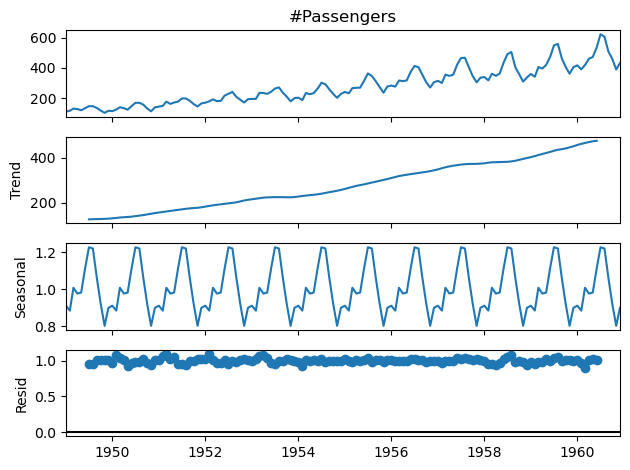

In [5]:
# 6. Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
result = seasonal_decompose(data['#Passengers'], model='multiplicative')
result.plot()
plt.show()

In [ ]:
# 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv("NYC_taxi_fare_data.csv")

model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['fare_amount']])

plt.scatter(df.index, df['fare_amount'], c=df['anomaly'])
plt.xlabel("Index")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection")
plt.show()

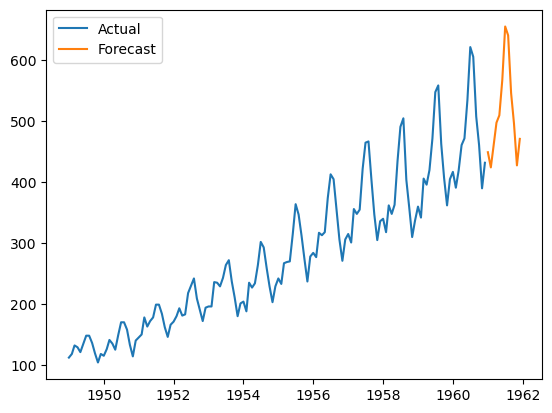

In [11]:
# 8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results. 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

model = SARIMAX(
    data['#Passengers'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

results = model.fit()
forecast = results.forecast(steps=12)

plt.figure()
plt.plot(data['#Passengers'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

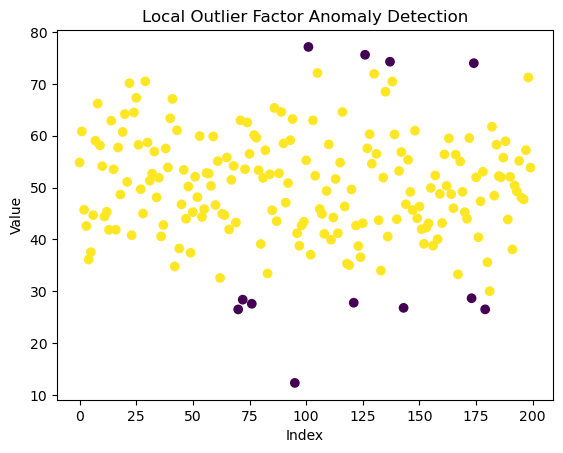

In [10]:
# 9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

df = pd.DataFrame({
    'value': np.random.normal(50, 10, 200)
})

lof = LocalOutlierFactor(n_neighbors=20)
df['lof'] = lof.fit_predict(df[['value']])

plt.scatter(df.index, df['value'], c=df['lof'])
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Local Outlier Factor Anomaly Detection")
plt.show()

10. You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

- Anomaly Detection
- Use Isolation Forest for real-time scalability
- Use LOF for localized anomalies
- DBSCAN for regional cluster analysis

- Forecasting Model
- SARIMAX to include weather variables
- Suitable for short-term (15-min interval) forecasting

- Validation & Monitoring
- Rolling window evaluation
- MAE / RMSE tracking
- Concept drift detection

- Business Impact
- Prevent blackouts
- Optimize power generation
- Reduce operational costs
- Enable proactive maintenance